In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [3]:
# Load the dataset
dataset = pd.read_csv('hate.csv', encoding='latin-1')
dataset.shape

(27756, 3)

In [4]:
dataset.head()

,Unnamed: 0,comment,label
0,1,dalits are lowlives,N
1,2,gay people are a burden to our society,N
2,3,Arabs are not welcome,N
3,4,I'm not saying we should actually eliminate he...,N
4,5,bananas are for black people,N


In [5]:
# check statistical measures
dataset.describe(include = 'all')

,Unnamed: 0,comment,label
count,27756.000000,27756,27756
unique,NaN,27756,3
top,NaN,dalits are lowlives,N
freq,NaN,1,14412
mean,13931.912956,NaN,NaN
std,8028.442962,NaN,NaN
min,1.000000,NaN,NaN
25%,6977.750000,NaN,NaN
50%,13933.500000,NaN,NaN
75%,20880.250000,NaN,NaN


In [6]:
# check for null values
dataset.isnull().sum()


Unnamed: 0    0
comment       0
label         0
dtype: int64

In [7]:
# check unique values
dataset.nunique()

Unnamed: 0    27756
comment       27756
label             3
dtype: int64

In [8]:
dataset.nunique()['label']

3

In [9]:
dataset.value_counts('label')

label
N    14412
P    13322
O       22
Name: count, dtype: int64

<Axes: xlabel='label'>

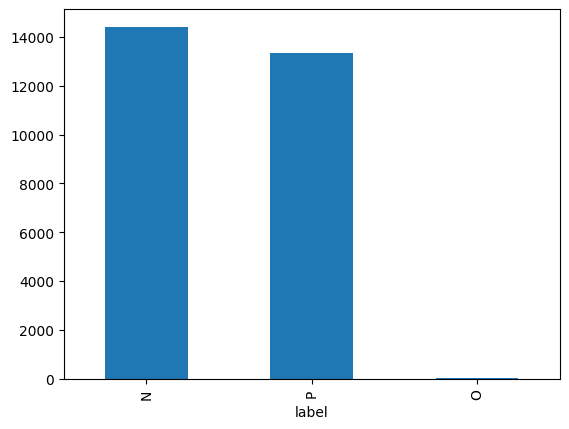

In [10]:
dataset.value_counts('label').plot(kind='bar')

In [11]:
dataset.value_counts('comment')

comment
\n"( holdin' zombie gals severed head )\nwhat do you mean?!?"\n                                                                                                                                                                                                                                                                                                        1
Wonderful observation. I cannot say much about the poor of the past (Jesus Christ) but the ones of today are not so terrible. They are only shown as scoundrels and thieves by the media. I do hope that a lying white supremacist enters politics and/or mainstream media and will expose these lies for what they really are.                                        1
Working with brownies is not as good as having an all western team, there's no point in denying it                                                                                                                                                                            

In [12]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the dataset
dataset['preprocessed_text'] = dataset['comment'].apply(preprocess_text)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['preprocessed_text'], dataset['label'], test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22204,)
(5552,)
(22204,)
(5552,)


In [16]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
# Convert text data to input format for BERT
inputs_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
inputs_test = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")

In [18]:
inputs_train

{'input_ids': tensor([[  101,  2045, 23624,  ...,     0,     0,     0],
        [  101, 17328,   102,  ...,     0,     0,     0],
        [  101,  6548,  4748,  ...,     0,     0,     0],
        ...,
        [  101, 25386,  4995,  ...,     0,     0,     0],
        [  101,  4632, 10085,  ...,     0,     0,     0],
        [  101,  2292, 12500,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [20]:
inputs_test

{'input_ids': tensor([[  101, 14689,  4747,  ...,     0,     0,     0],
        [  101,  4012, 10814,  ...,     0,     0,     0],
        [  101,  2388,  2375,  ...,     0,     0,     0],
        ...,
        [  101,  2156,  2336,  ...,     0,     0,     0],
        [  101,  3532,  2158,  ...,     0,     0,     0],
        [  101,  2514,  2066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [21]:
# Model selection and training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Define the model pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6435518731988472
Classification Report:
               precision    recall  f1-score   support

           N       0.66      0.64      0.65      2894
           O       0.00      0.00      0.00         4
           P       0.62      0.65      0.63      2654

    accuracy                           0.64      5552
   macro avg       0.43      0.43      0.43      5552
weighted avg       0.64      0.64      0.64      5552



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_pred contains the predicted labels and y_test contains the true labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6435518731988472
Precision: 0.6438549337893746
Recall: 0.6435518731988472
F1-score: 0.6434861801406672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define the model pipeline with Random Forest classifier
model_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Train the model
model_pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_pipeline_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6435518731988472
Classification Report:
               precision    recall  f1-score   support

           N       0.66      0.64      0.65      2894
           O       0.00      0.00      0.00         4
           P       0.62      0.65      0.63      2654

    accuracy                           0.64      5552
   macro avg       0.43      0.43      0.43      5552
weighted avg       0.64      0.64      0.64      5552



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the model pipeline with Logistic Regression
model_pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

# Train the model
model_pipeline_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model_pipeline_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_score_lr = f1_score(y_test, y_pred_lr, average='weighted')
classification_report_lr = classification_report(y_test, y_pred_lr)

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_score_lr)
print("\nClassification Report:")
print(classification_report_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for Logistic Regression Model:
Accuracy: 0.639949567723343
Precision: 0.6402748907924468
Recall: 0.639949567723343
F1 Score: 0.6398876749417253

Classification Report:
              precision    recall  f1-score   support

           N       0.66      0.64      0.65      2894
           O       0.00      0.00      0.00         4
           P       0.62      0.64      0.63      2654

    accuracy                           0.64      5552
   macro avg       0.43      0.43      0.43      5552
weighted avg       0.64      0.64      0.64      5552



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from joblib import dump

dump(model_pipeline_lr, 'model.pkl')

['model.pkl']